In [42]:
!pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv("Housing.csv")
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [45]:
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["mainroad"]=le.fit_transform(df["mainroad"])
df["basement"]=le.fit_transform(df["basement"])
df["guestroom"]=le.fit_transform(df["guestroom"])
df["hotwaterheating"]=le.fit_transform(df["hotwaterheating"])
df["airconditioning"]=le.fit_transform(df["airconditioning"])
df["prefarea"]=le.fit_transform(df["prefarea"])
df["furnishingstatus"]=le.fit_transform(df["furnishingstatus"])
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1


In [47]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [48]:
y=df["price"]

for i in df.columns:
    if (df[i].name != y.name):
        print(i)


area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


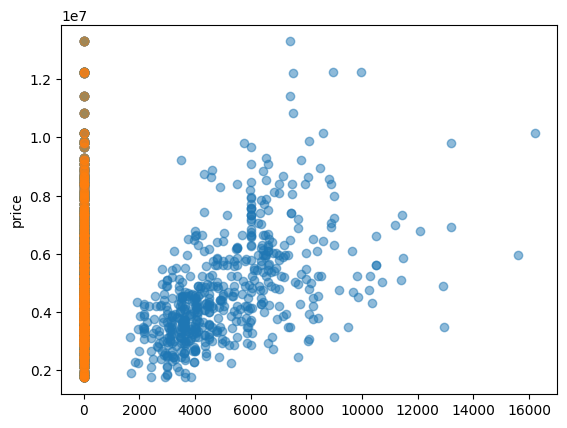

In [49]:
y= df["price"]

for i in df.columns:
    if (df[i].name != y.name):
        plt.scatter(df[i],y,alpha=0.5)
        plt.xlabel=(df[i].name)
        plt.ylabel("price")
        plt.show

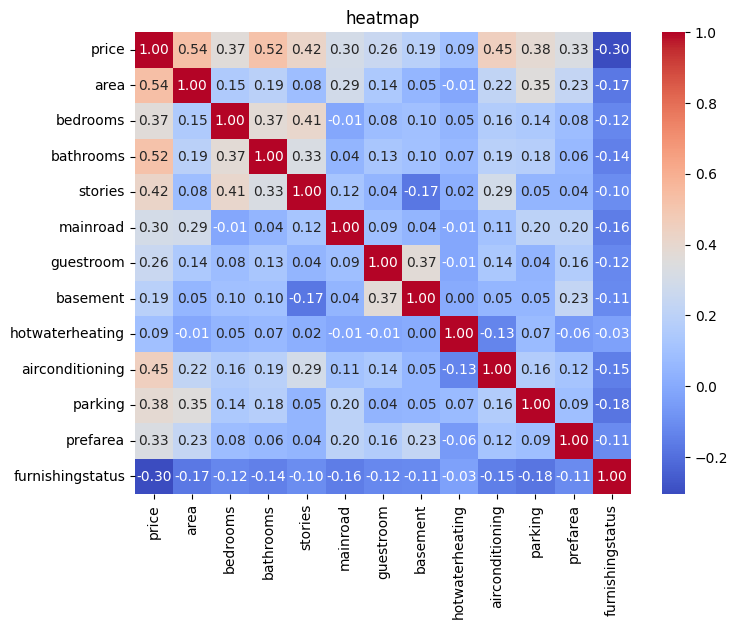

In [50]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("heatmap")
plt.show()


In [51]:
X = np.array(df['area']).reshape(-1,1)
y=df["price"]

In [52]:
X_train,X_test ,y_train ,y_test = train_test_split(X , y, test_size=0.2,random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred = model.predict(X_test)


In [55]:
table = np.column_stack((y_test, y_pred))
print(tabulate(table[:5], headers=("Actual price","Predicted price"), tablefmt="fancy_grid"))

╒════════════════╤═══════════════════╕
│   Actual price │   Predicted price │
╞════════════════╪═══════════════════╡
│       4.06e+06 │       5.02406e+06 │
├────────────────┼───────────────────┤
│       6.65e+06 │       5.2795e+06  │
├────────────────┼───────────────────┤
│       3.71e+06 │       4.2322e+06  │
├────────────────┼───────────────────┤
│       6.44e+06 │       4.6409e+06  │
├────────────────┼───────────────────┤
│       2.8e+06  │       4.19814e+06 │
╘════════════════╧═══════════════════╛


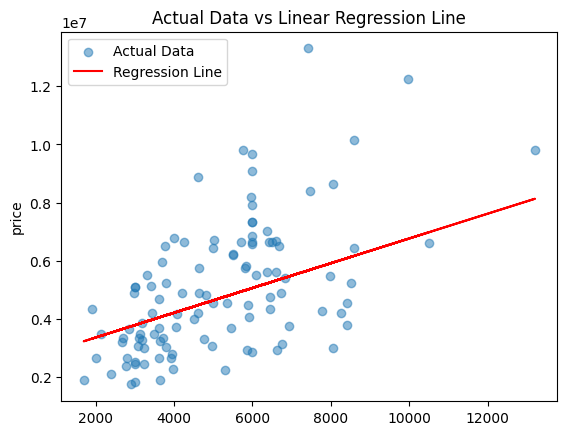

In [56]:
plt.scatter(X_test, y_test, alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color='r', label="Regression Line")

plt.xlabel=("area",)  
plt.ylabel("price") 
plt.title("Actual Data vs Linear Regression Line")
plt.legend()
plt.show()


In [57]:
r_squared= np.round(r2_score(y_test, y_pred),4)
print("R squared: ",r_squared)

MAE= np.round(mean_absolute_error(y_test,y_pred),4)
print("MAE: ", MAE)

RMSE = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print("RMSE: ",RMSE)

R squared:  0.2729
MAE:  1474748.1338
RMSE:  1917103.7021
